# Classifier: Decision Tree

* Non-parametric supervised learning algorithm
* Tree model to show all consequences based on each variable, 
* Used to predict the value of a target variable

In [9]:
# Classifier: Decision Tree (b)

# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 6.b.1 Modelling - Implementing Model

# Classification using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Reading the processed data from local directory
processed_train=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_train.csv")
processed_test=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_test.csv")
target=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/target.csv")

# split the training data, test with sizes 
X_train, X_test, y_train, y_test = train_test_split(processed_train, target, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train the model with the default settings
tree_clf = DecisionTreeClassifier()

# Fit the clasifier model
tree_clf.fit(X_train, y_train)

# make predictions from model
y_pred=tree_clf.predict(X_test)

(712, 11) (179, 11)
(712, 1) (179, 1)


Accuracy: 0.7262569832402235


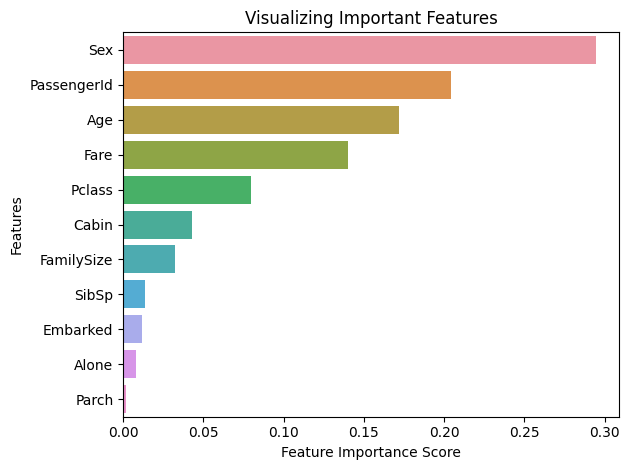

In [6]:
# # 6.b.2 Modelling - model analysis

feature_imp = pd.Series(tree_clf.feature_importances_, index=processed_train.columns).sort_values(ascending=False)
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# # 78%

# Plot out the features' importance using a barplot
# plt.figure(figuresize=(20,5))
plt.figure()
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()           

In [7]:
# 6.b.3 Modelling - Hyperparamater Tuning and model optimization

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Removing less important features (determined above)
new_train = processed_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
new_test = processed_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.2)

# fit the classifier for tuning hyperparameter
tree_clf = DecisionTreeClassifier()

# Grid search CV (cross validation) to find the best hyperparameters for tuning
tree_param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'min_samples_split' : [2, 3, 6, 9],
    'min_samples_leaf' : [1, 3, 6, 9],
}

# Perform Hyperparameter Tuning
tree_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_param_grid)
tree_grid_search.fit(X_train, y_train)
print(tree_grid_search.best_estimator_)

# Fit the tuned model
tuned_tree_clf=tree_grid_search.best_estimator_
tuned_tree_clf.fit(X_train, y_train)

# Tuned model make predictions on test
y_pred = tuned_tree_clf.predict(X_test)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=9,
                       min_samples_leaf=6)


Tuned Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       117
           1       0.71      0.81      0.76        62

    accuracy                           0.82       179
   macro avg       0.80      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179

Your submission was successfully saved!


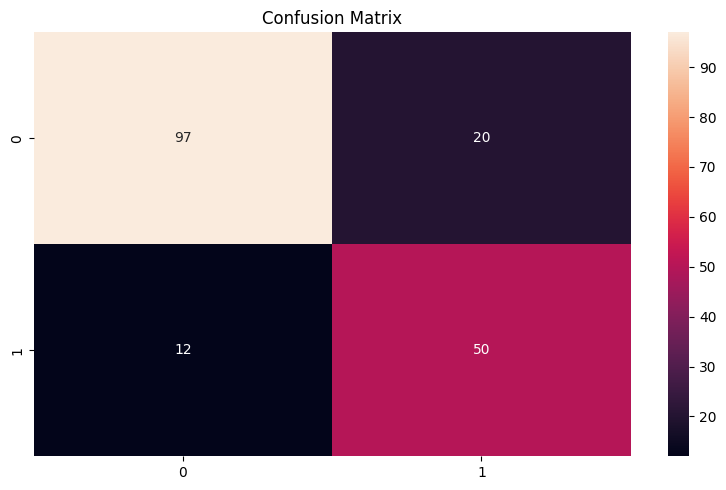

In [8]:
# 6.b.4 Modelling - Result Presentation

# Accuracy Score, can go as high as 85%
print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# Classification report
print(classification_report(y_test,y_pred))

# Confusion matrix (TP, FP, TN, NN)
conf_matrix=confusion_matrix(y_test, y_pred)

# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# make predictions on testing data again
prediction = tuned_tree_clf.predict(new_test)
# Make a new column to store the predictions
new_test['Survival_Predictions'] = pd.Series(prediction)

# Submit Output in Kaggle 
output = pd.DataFrame({'PassengerId': new_test.PassengerId, 'Survived': prediction})

# print(output)

# Assign output to a csv file
# output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

# Summary of Decision Tree Classifier: 

Data: 0.72727, 0.76555, 0.77272, 0.77511, 0.78947
* More variation than a random forest

## Advantages: 
* Easy to interpret
* Needed little to no data preparation
* Flexible (can be used in regression and classification)
* Log cost to process the tree
* Handle both numerical and categorical data
* Handle multi-output problems
* Used white box model, an observable model can be easily explained
* Can validate a model using statistical tests
* Can perform well even some of its assumptions are violated

## Disadvantages:
* Easy to overfit, don't generalzie to well
* Easily unstable cause one data can ruin the whole tree
* Its predictions are neither smooth nor continuous since it's approximations
* Can create biased trees
* NP-Complete, hard to learn globally optimal decision tree

# Decision Tree parameter (learned from sklearn):

criterion: Function to measure split {“gini”, “entropy”, “log_loss”}

splitter: strat to split each node, best for best split; random for best random split {“best”, “random”}

max_depth: tree max dept, usually none

min_samples_split: min # of samples to split, usually 1

min_samples_leaf: min # of samples to be a leaf, usually 1

min_weight_fraction_leaf: min weight fraction of the sum of all weights to be a leaf node

max_feature: # of features to consider when look at best split, usually int, RandomState instance or None, default=None

random_state: randomness of the estimator, usually nt, RandomState instance or None, default=None, used because when max_features<=nfeatures algo always select max_features

max_leaf_nodes: usually int or default None aka unlimited

min_impurity_decrease: node splits if this split induce an impunity larger than given value

class_weight: weighting of classes, usually in dict, list of dict or “balanced”, default=None

ccp_alpha: complexity parameter used for cost-complexity pruning (CCP), default=0.0